In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 9.1.21, 9.4.7, 9.5.21, 9.6.21

# ======================= 9.1.21  =======================

In [6]:
def newton_method(f, df, ddf, x0, epsilon=1e-6, max_iter=1000):
    """
    Метод Ньютона для нахождения минимума функции.

    Параметры:
    f : функция, минимизируемая функция
    df : функция, первая производная функции f
    ddf : функция, вторая производная функции f
    x0 : float, начальное приближение
    epsilon : float, точность
    max_iter : int, максимальное количество итераций

    Возвращает:
    x_min : float, точка минимума функции
    """
    x_n = x0
    iterations = 0
    for _ in range(max_iter):
        f_prime = df(x_n)
        f_double_prime = ddf(x_n)
        if abs(f_double_prime) < np.finfo(float).eps:
            raise ValueError("Вторая производная слишком мала, деление на ноль")
        x_n1 = x_n - f_prime / f_double_prime
        if abs(x_n1 - x_n) < epsilon:
            return x_n1, iterations
        x_n = x_n1
        iterations += 1
    raise ValueError("Метод не сошелся за максимальное количество итераций")

    

In [7]:
f = lambda x: x**5 - 5**x
df = lambda x: 5*x**4 - 5**x*np.log(5)
ddf = lambda x: 20*x**3 - 5**x*np.log(5)*np.log(5)

a, b = 0.5, 1.5
x0 = 1  # начальное приближение
epsilon = 1e-6

x_min, n = newton_method(f, df, ddf, x0, epsilon)
print(f"Минимум функции достигается в точке x = {x_min}, найдет за {n} итераций.")


Минимум функции достигается в точке x = 1.2410554672442062, найдет за 5 итераций.


# ======================= 9.4.7 =======================


In [18]:
def f(x, n):
    return ((-1)**n) * np.cos(2 * n * x) / n**(5/2)

def partial_sum(x, N=350):
    return sum(f(x, n) for n in range(1, N + 1))

def func_to_optimize(x):
    return partial_sum(x)

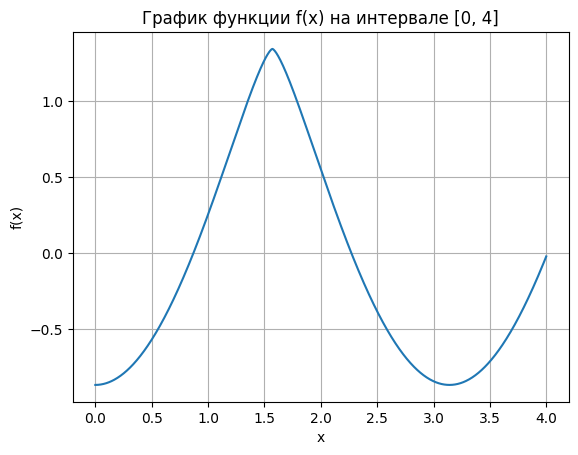

In [19]:
a, b = 0, 4
x_values = np.linspace(a, b, 1000)
y_values = partial_sum(x_values)

plt.plot(x_values, y_values)
plt.title('График функции f(x) на интервале [0, 4]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [20]:
def golden_section_search(f, a, b, eps=1e-4):
    golden_ratio = (1 + np.sqrt(5)) / 2
    c = b - (b - a) / golden_ratio
    d = a + (b - a) / golden_ratio
    while abs(c - d) > eps:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / golden_ratio
        d = a + (b - a) / golden_ratio
    return (b + a) / 2

In [21]:
minimum = golden_section_search(func_to_optimize, a, b)
maximum = golden_section_search(lambda x: -func_to_optimize(x), a, b)

print(f"Минимум функции достигается в точке x = {minimum} со значением f(x) = {func_to_optimize(minimum)}")
print(f"Максимум функции достигается в точке x = {maximum} со значением f(x) = {func_to_optimize(maximum)}")

Минимум функции достигается в точке x = 3.141596527569854 со значением f(x) = -0.8671996716015662
Максимум функции достигается в точке x = 1.5708643707462782 со значением f(x) = 1.3413853281698072


# ======================= 9.5.21 =======================


In [23]:
from scipy.optimize import minimize

def f(xy):
    x, y = xy
    return x**2 + 3*y**2 + np.sin(x - y + 3)

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])


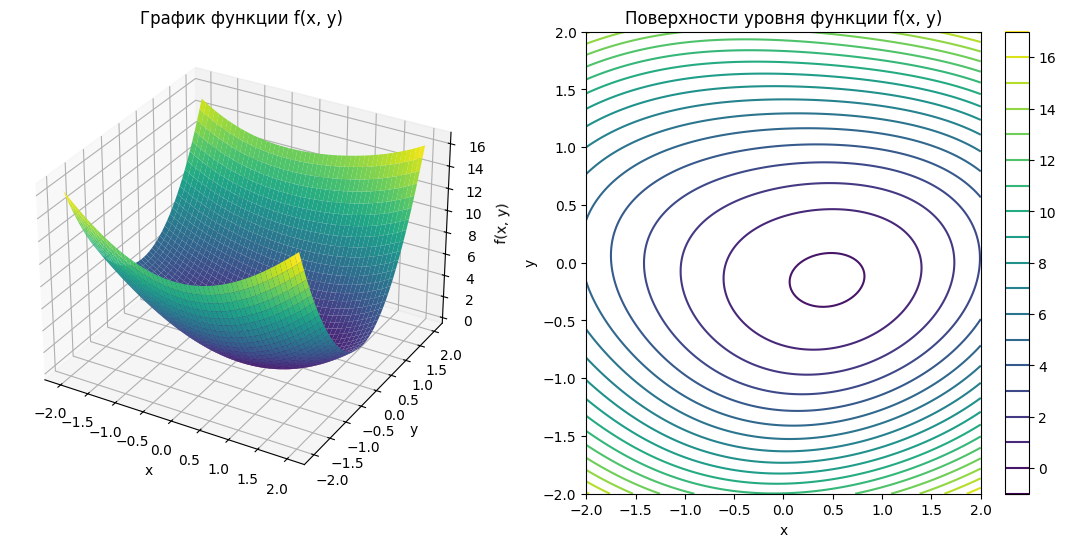

In [24]:
# 3D график функции
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('График функции f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Контурный график поверхностей уровня
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, 20, cmap='viridis')
ax2.set_title('Поверхности уровня функции f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour, ax=ax2)

plt.show()

In [25]:
initial_guess = [0, 0]
result = minimize(f, initial_guess, bounds=[(-2, 2), (-2, 2)], tol=1e-6)

if result.success:
    print(f"Минимум функции достигается в точке x = {result.x[0]}, y = {result.x[1]} со значением f(x, y) = {result.fun}")
else:
    print("Минимум функции не найден.")


Минимум функции достигается в точке x = 0.448742081438306, y = -0.14958301051635287 со значением f(x, y) = -0.17252314864696905
